In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import warnings

In [32]:
warnings.filterwarnings("ignore")

In [2]:
tips = sns.load_dataset('tips')

In [3]:
iris = sns.load_dataset('iris')

In [5]:
flights = sns.load_dataset('flights')

In [6]:
titanic = pd.read_csv("Dataset/titanic.csv")

In [8]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
87,18.28,4.00,Male,No,Thur,Lunch,2
140,17.47,3.50,Female,No,Thur,Lunch,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2
59,48.27,6.73,Male,No,Sat,Dinner,4
17,16.29,3.71,Male,No,Sun,Dinner,3


## 1. ScatterPlot (numerical-numerical)

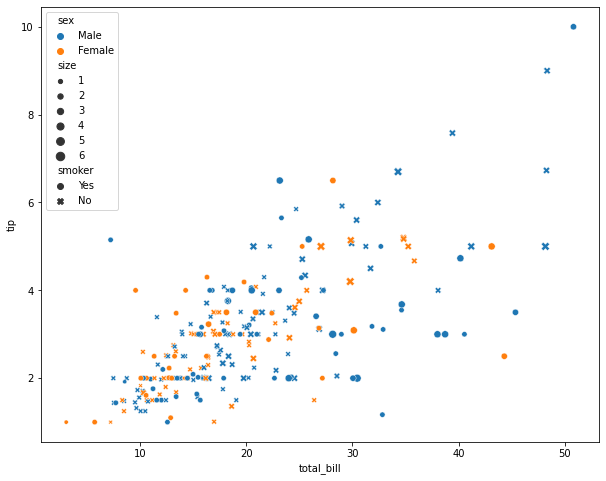

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(tips.total_bill, tips.tip,hue=tips.sex, style=tips.smoker, size=tips['size']);

- This is call Multivarient EDA we use 5 different values inside single graph

## 2. Bar Plot (numerical - categorical)

In [21]:
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
253,1145,0,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S
91,983,0,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.7750,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S


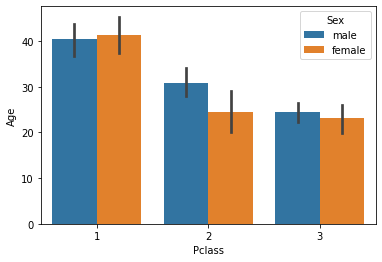

In [34]:
sns.barplot(titanic.Pclass,titanic.Age,hue=titanic.Sex);

## 3. Box Plot (Numerical - Categorical)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

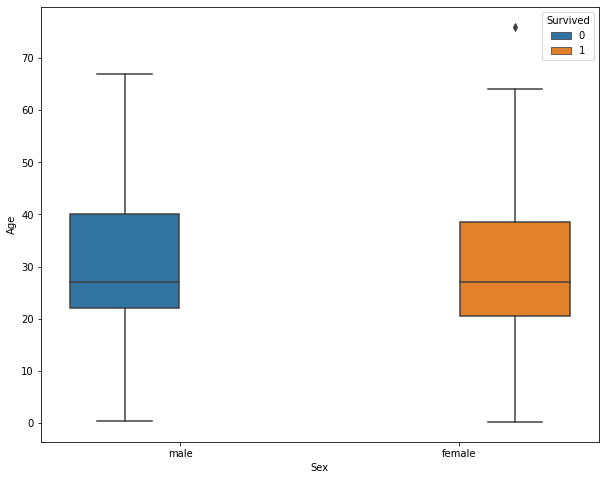

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(titanic["Sex"],titanic["Age"],hue=titanic["Survived"])

## 4. DistPlot (Numerical - Categorical)

<AxesSubplot:xlabel='Age', ylabel='Density'>

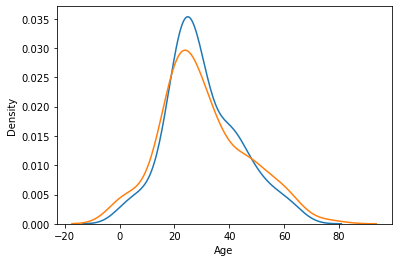

In [38]:
sns.distplot(titanic[titanic["Survived"]==0]["Age"],hist=False)#Blue line
sns.distplot(titanic[titanic["Survived"]==1]["Age"],hist=False)#Orange line

## 5. HeatMap (Categorical - Categorical)

In [39]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [41]:
pd.crosstab(titanic["Pclass"], titanic["Survived"])

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

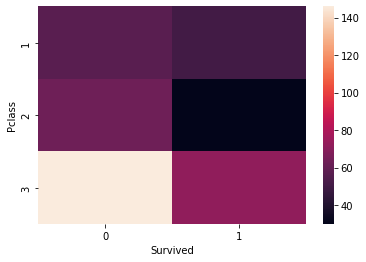

In [40]:
sns.heatmap(pd.crosstab(titanic["Pclass"], titanic["Survived"]))

In [47]:
#Pclass and Survived
titanic.groupby("Pclass").mean()["Survived"]*100

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

In [46]:
#Sex and Survived
titanic.groupby("Sex").mean()["Survived"]

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

In [49]:
#Embarked and Survived
titanic.groupby("Embarked").mean()["Survived"]*100

Embarked
C    39.215686
Q    52.173913
S    32.592593
Name: Survived, dtype: float64

## 6. ClusterMap (Categorical - Categorical)

In [55]:
pd.crosstab(titanic["SibSp"], titanic["Survived"])

Survived,0,1
SibSp,,
0,195,88
1,56,54
2,8,6
3,3,1
4,3,1
5,0,1
8,1,1


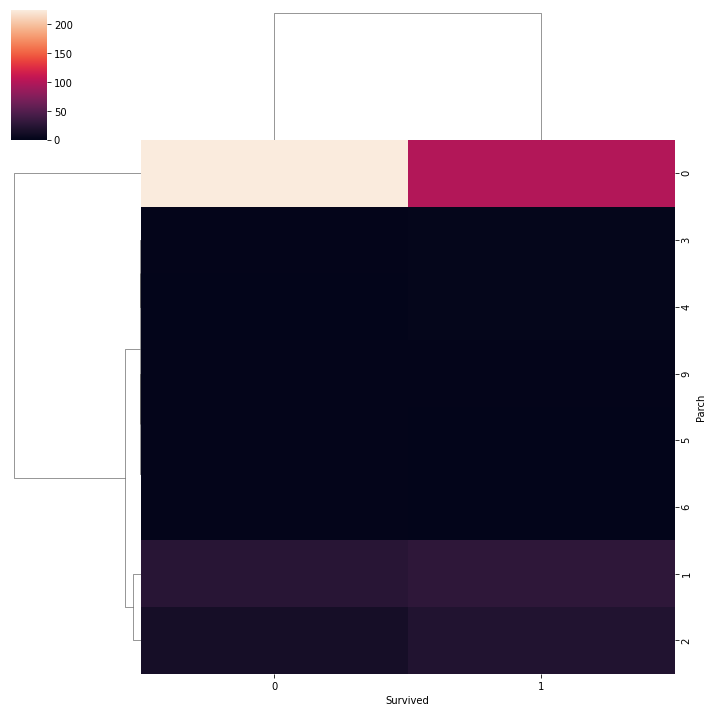

In [57]:
sns.clustermap(pd.crosstab(titanic["Parch"], titanic["Survived"]))

## 7. PairPlot

In [58]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,virginica
126,6.2,2.8,4.8,1.8,virginica
40,5.0,3.5,1.3,0.3,setosa
128,6.4,2.8,5.6,2.1,virginica
87,6.3,2.3,4.4,1.3,versicolor


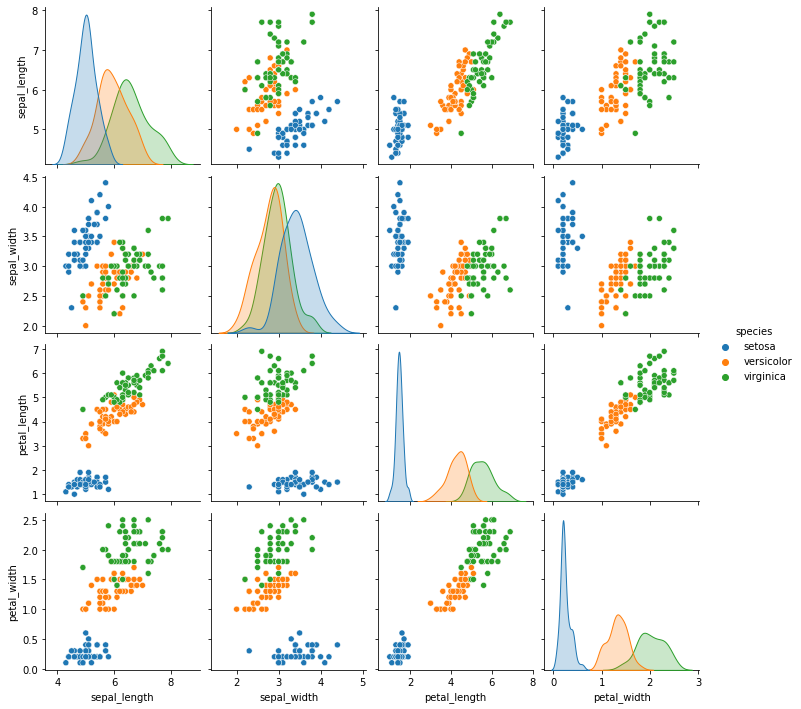

In [60]:
sns.pairplot(iris, hue="species");

## 8. LinePlot (Numerical - Numerical)

In [62]:
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [67]:
fG=pd.DataFrame(flights.groupby("year").sum().reset_index())

<AxesSubplot:xlabel='year', ylabel='passengers'>

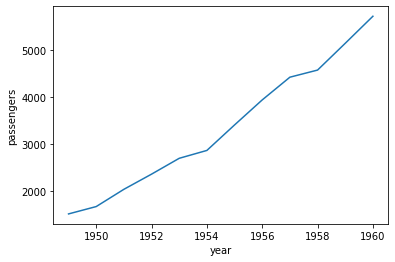

In [68]:
# Line Plot is best when we have a time based data
sns.lineplot(fG["year"],fG["passengers"])

In [70]:
#Plotting Heatmap in flights dataset
flights.pivot_table(values="passengers",index="year", columns="month")

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

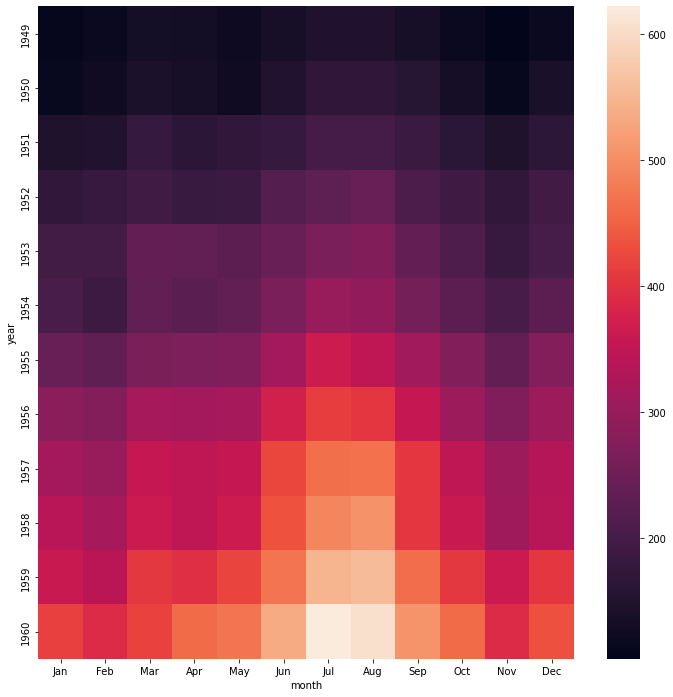

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(flights.pivot_table(values="passengers",index="year", columns="month"))

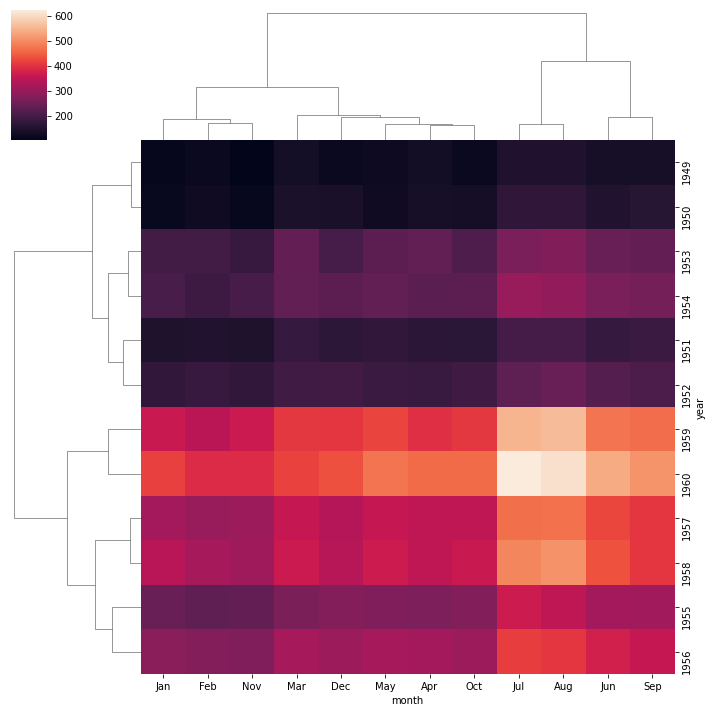

In [73]:
sns.clustermap(flights.pivot_table(values="passengers",index="year", columns="month"))